# Project 1: Investigate TMVB Movie Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset (TMDb_movie_data) contains information about 10,000 movies collected from The Movie Database. It contains 10866 rows and 21 columns with information about movies, including original title, popularity, budget, revenue, user ratings, director, production company etc. 


### Question(s) for Analysis
>The following questions are important for analyzing the dataset.
>1. What are the most popular movies?
>2. What are the properties associated with the popular movies
>3. Do runtime has effect on the profit of movies?
>3. Which genres are most popular?
>4. Which of the directors is the most popular?
>5. What are the factors associated with popularity of director?
>6. Does popularity of movies correlate to the popularity of directors?

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Here, we are going to carry out some checks on the the dataset and then clean it up for analysis purpose.
>We are going to carry out the following:
>1. Check information and description of the dataset.
>2. Check for missing values.
>3. Check for duplicates.
>4. Drop some columns that are not required for our analysis.
>5. Create new column(s) to explore our dataset.

In [466]:
# Load the csv file and read the first five rows of the file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Some columns like cast, genres and production companies have saveral items in each cell. We may have to split them.

In [467]:
# Check for a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>There are 21 columns in the dataset. The data types are int, float and object.

In [468]:
# Check for useful descriptive statistics for each column of dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [469]:
# Checking for the various columns and their corresponding index
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


>From the 21 available columns, cast, homepage, tagline, keywords, production_companies and imdb_id have null values.

### Data Cleaning
> We will drop some columns with null values. This is due to the fact that they are not required to answer the analysis questions listed in the introductory part.
>We are also going to convert the datatype of release date to datetime.
 

In [470]:
# Drop columns that will not be used for this analysis
df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis =1, inplace =True)

In [471]:
# Replacing the year part with the `release_year` column and converting datatype
df.release_date = df.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)

df.release_date = pd.to_datetime(df.release_date)

In [472]:
#Check to confirm dropped columns
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [473]:
# Check for missing values
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [474]:
#Drop the missing values in Directors, Genres and production_companies
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9807 non-null   int64         
 1   popularity            9807 non-null   float64       
 2   budget                9807 non-null   int64         
 3   revenue               9807 non-null   int64         
 4   original_title        9807 non-null   object        
 5   director              9807 non-null   object        
 6   runtime               9807 non-null   int64         
 7   genres                9807 non-null   object        
 8   production_companies  9807 non-null   object        
 9   release_date          9807 non-null   datetime64[ns]
 10  vote_count            9807 non-null   int64         
 11  vote_average          9807 non-null   float64       
 12  release_year          9807 non-null   int64         
 13  budget_adj       

In [475]:
# Drop duplicate values in the dataset
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [476]:
# Split genres column into various types
df['genres'] = df['genres'].str.split('[ |]')
df = df.explode('genres').reset_index(drop=True)

In [477]:
# Check to confirm the splitting of genres
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [478]:
# Split production companies column into various types
df['production_companies'] = df['production_companies'].str.split('[ |]')
df = df.explode('production_companies').reset_index(drop=True)

In [479]:
# Check to confirm the splitting of genres
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Amblin,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Legendary,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [480]:
# Check for the number of zeros
df[['budget', 'revenue', 'runtime']].apply(lambda x: x == 0).sum()

budget     60321
revenue    67069
runtime      133
dtype: int64

In [481]:
#Create a column named 'profit' to find the net profit of various movies
df['profit'] = df['revenue'] - df['budget']
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Amblin,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Legendary,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


In [482]:
# Convert profit to hundreds of million
df['profit'] = df.profit/100000000

In [483]:
# Check for profit details
df['profit'].describe()

count    153756.000000
mean          0.409374
std           1.291091
min          -4.139124
25%          -0.002000
50%           0.000000
75%           0.292515
max          25.445058
Name: profit, dtype: float64

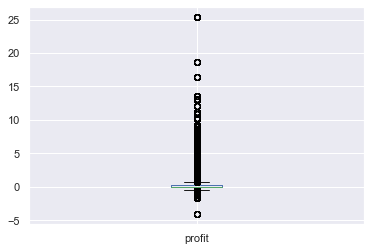

In [484]:
df['profit'].plot.box();

>There are few upper outliers in profit column. 

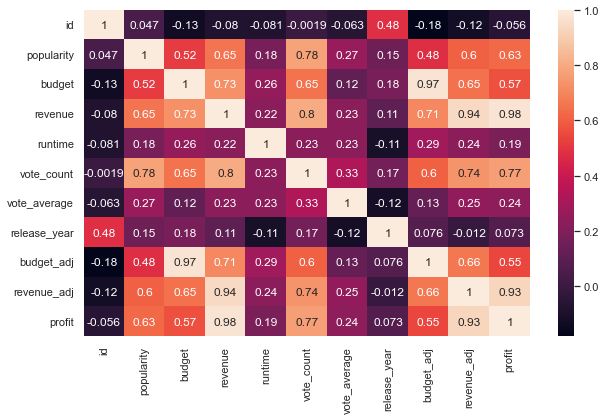

In [485]:
# Ploting correlation Matrix table to view correlations between various dataset
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

>There is a positive correlation among appreciable datasets. A few, however are negatively correlated.

<a id='eda'></a>
## Exploratory Data Analysis

>We are going to investigate our dataset base on analysis questions listed earlier. Statistical and Visual creation will be used to analyze the dataset. 

### Research Question 1 Which of the movies are the most popular?

Text(0, 0.5, 'Number of Movies')

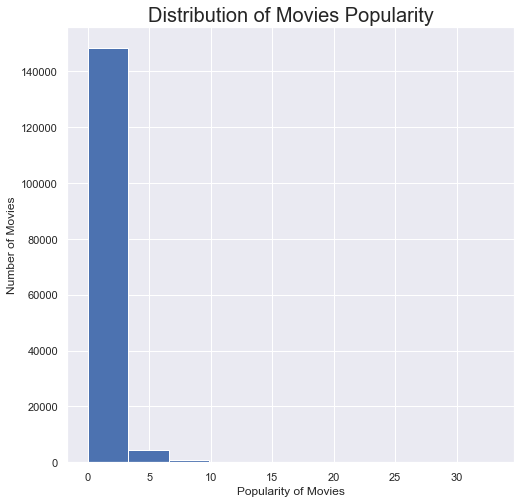

In [486]:
# Distribution of movies in terms of popularity
df.popularity.hist(figsize =(8,8))
plt.title('Distribution of Movies Popularity', fontsize =20);
plt.xlabel('Popularity of Movies')
plt.ylabel('Number of Movies')

>The distribution is right-skewed. This indicates that there are more movies that are not popular than popular ones.

>Now, let us find out about the movies that are profitable.

In [487]:
# Finding profitable and Unprofitable movies
profitable = df.query('profit >= 0.292515')
Unprofitable = df.query('profit < 0.292515')

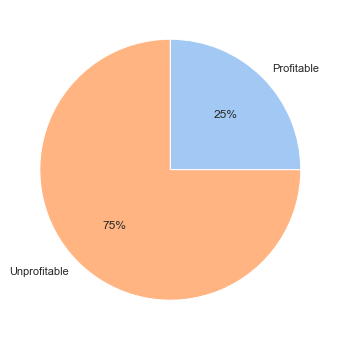

In [488]:
#Finding the proportion of profitable movies by percentage
data = [38446, 115310]
labels = ['Profitable', 'Unprofitable']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%');

> The above chart shows that only one-fourth (25%) of the movies are profitable.

In [489]:
#Grouping Movies in terms of popularity and profit
movies_group = df.groupby(['popularity', 'original_title'], as_index= False)
movies_popularity = movies_group['profit'].mean().sort_values('popularity',ignore_index=True,axis=0, ascending=False)

# Finding the top ten (10) movies
top_movies = movies_popularity.head(10)
print(top_movies)

   popularity                         original_title     profit
0   32.985763                         Jurassic World  13.635288
1   28.419936                     Mad Max: Fury Road   2.284364
2   24.949134                           Interstellar   4.567525
3   14.311205                Guardians of the Galaxy   6.033124
4   13.112507                              Insurgent   1.852382
5   12.971027    Captain America: The Winter Soldier   5.447666
6   12.037933                              Star Wars   7.643980
7   11.422751                              John Wick   0.587399
8   11.173104           Star Wars: The Force Awakens  18.681782
9   10.739009  The Hunger Games: Mockingjay - Part 1   6.271002


>Jurassic World appeared to be the most popular.

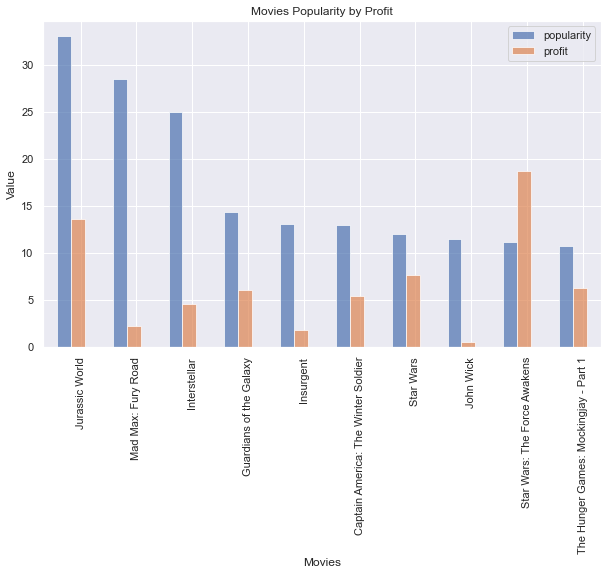

In [490]:
# Plot of Movies Popularity and Profit
ind = np.arange(len(top_movies['original_title']))  # the x locations for the groups
width = 0.35       # the width of the bars
top_movies.plot(kind ='bar', title ='Movies Popularity by Profit', alpha =.7);

# title and labels
plt.ylabel('Value')
plt.xlabel('Movies')
locations = ind + width / 2  # xtick locations
labels = top_movies['original_title']  # xtick labels
plt.xticks(locations, labels);

In [491]:
df['profit'].describe() # Checking for the highest profit

count    153756.000000
mean          0.409374
std           1.291091
min          -4.139124
25%          -0.002000
50%           0.000000
75%           0.292515
max          25.445058
Name: profit, dtype: float64

> Although, there is a positive correlation between popularity and profit of movies. However, the chart above shows that the most popular movies may not necessarily be the most profitable. Other factors may contribute.

In [492]:
# Grouping Movies in terms of popularity and vote count
df['vote_count'] = df.vote_count/1000 # Convert vote counts to thousand.
count_group = df.groupby(['popularity', 'original_title'], as_index= False)
count_popularity = count_group['vote_count'].mean().sort_values('popularity',ignore_index=True,axis=0, ascending=False)

# Finding the top ten (10) movies
count_movies = count_popularity.head(10)
print(count_movies)

   popularity                         original_title  vote_count
0   32.985763                         Jurassic World       5.562
1   28.419936                     Mad Max: Fury Road       6.185
2   24.949134                           Interstellar       6.498
3   14.311205                Guardians of the Galaxy       5.612
4   13.112507                              Insurgent       2.480
5   12.971027    Captain America: The Winter Soldier       3.848
6   12.037933                              Star Wars       4.428
7   11.422751                              John Wick       2.712
8   11.173104           Star Wars: The Force Awakens       5.292
9   10.739009  The Hunger Games: Mockingjay - Part 1       3.590


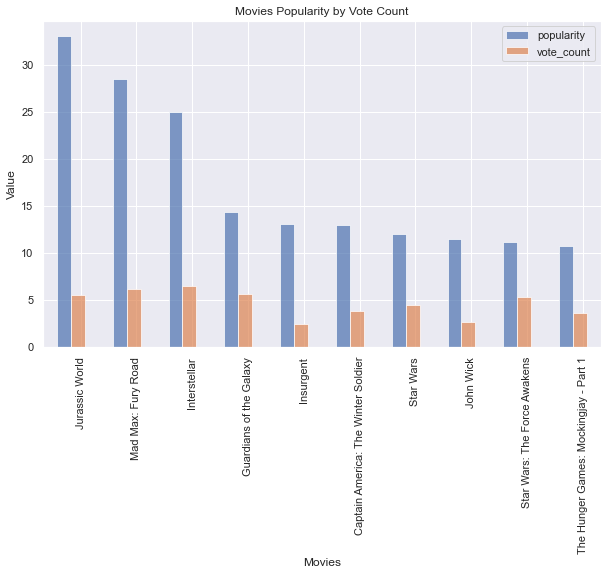

In [493]:
# Plot of Movies Popularity and Vote count
ind = np.arange(len(count_movies['original_title']))  # the x locations for the groups
width = 0.35       # the width of the bars
count_movies.plot(kind ='bar', title ='Movies Popularity by Vote Count', alpha =.7);

# title and labels
plt.ylabel('Value')
plt.xlabel('Movies')
locations = ind + width / 2  # xtick locations
labels = count_movies['original_title']  # xtick labels
plt.xticks(locations, labels);

In [494]:
df['vote_count'].describe() # Checking for the highest vote count

count    153756.000000
mean          0.356147
std           0.757570
min           0.010000
25%           0.024000
50%           0.075000
75%           0.306000
max           9.767000
Name: vote_count, dtype: float64

>There is also a positive correlation between popularity of movies and vote count. The chart indicates that the most popular movies may not have the highest vote count. High vote count alone may not translates to popularity as the movie with highest vote count is not the most popular (as seen in vote count description). Other factors may also contibute. 

In [495]:
# Grouping Movies in terms of popularity and budget
df['budget'] = df.budget/10000000 # Convert budget to thousands of million.
budget_group = df.groupby(['popularity', 'original_title'], as_index= False)
budget_popularity = budget_group['budget'].mean().sort_values('popularity',ignore_index=True,axis=0, ascending=False)

# Finding the top ten (10) movies
budget_movies = budget_popularity.head(10)
print(budget_movies)

   popularity                         original_title  budget
0   32.985763                         Jurassic World    15.0
1   28.419936                     Mad Max: Fury Road    15.0
2   24.949134                           Interstellar    16.5
3   14.311205                Guardians of the Galaxy    17.0
4   13.112507                              Insurgent    11.0
5   12.971027    Captain America: The Winter Soldier    17.0
6   12.037933                              Star Wars     1.1
7   11.422751                              John Wick     2.0
8   11.173104           Star Wars: The Force Awakens    20.0
9   10.739009  The Hunger Games: Mockingjay - Part 1    12.5


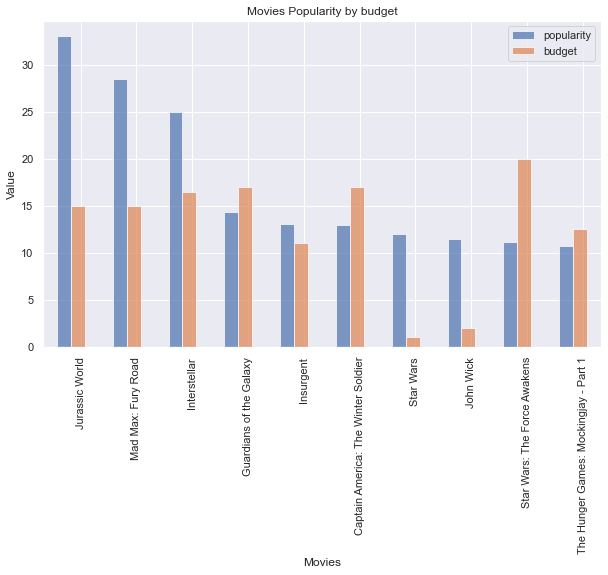

In [496]:
# Plot of Movies Popularity and budget
ind = np.arange(len(budget_movies['original_title']))  # the x locations for the groups
width = 0.35       # the width of the bars
budget_movies.plot(kind ='bar', title ='Movies Popularity by budget', alpha =.7);

# title and labels
plt.ylabel('Value')
plt.xlabel('Movies')
locations = ind + width / 2  # xtick locations
labels = count_movies['original_title']  # xtick labels
plt.xticks(locations, labels);

> The chart indicates that budget alone is not the determinant of movies popularity.'Star Wars: The Force Awakens' movie has the highest budget but it is not the most popular.

# Question related to Genres of movies

## What are the most popular genres?

In [497]:
#Grouping movies' genres in terms of popularity and profit
df =df.drop_duplicates(subset ='genres', keep='first', inplace=False) # Drop genres that are duplicated and pick the most popular one.
genres_group = df.groupby(['popularity', 'genres'], as_index= False)
genres_popularity = genres_group['profit'].mean().sort_values('popularity',ignore_index=True,axis=0, ascending=False)

# Finding the top ten (10) genres
top_genres = genres_popularity.head(10)
print(top_genres)

   popularity     genres     profit
0   32.985763   Thriller  13.635288
1   32.985763    Science  13.635288
2   32.985763    Fiction  13.635288
3   32.985763  Adventure  13.635288
4   32.985763     Action  13.635288
5   11.173104    Fantasy  18.681782
6    9.335014      Crime  13.162494
7    9.110700    Western   3.979505
8    9.110700      Drama   3.979505
9    7.404165     Family  10.827310


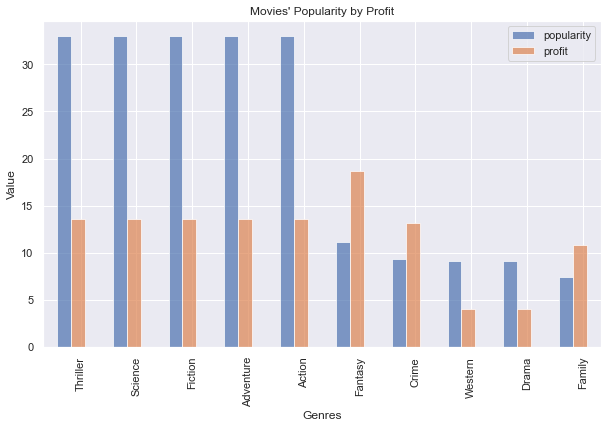

In [498]:
# Plot of Movies' genres Popularity and Profit
ind = np.arange(len(top_genres['genres']))  # the x locations for the groups
width = 0.35       # the width of the bars
top_genres.plot(kind ='bar', title = "Movies' Popularity by Profit", alpha =.7);

# title and labels
plt.ylabel('Value')
plt.xlabel('Genres')
locations = ind + width / 2  # xtick locations
labels = top_genres['genres']  # xtick labels
plt.xticks(locations, labels);

> It can be infered from the chart that the most popular genres may not necessarily be the most profitable. From the top ten popular genres however, 'Crime movies' has  the least profit. This indicates that other factors may be responsible.

> Now, let us analyse genres with runtime.

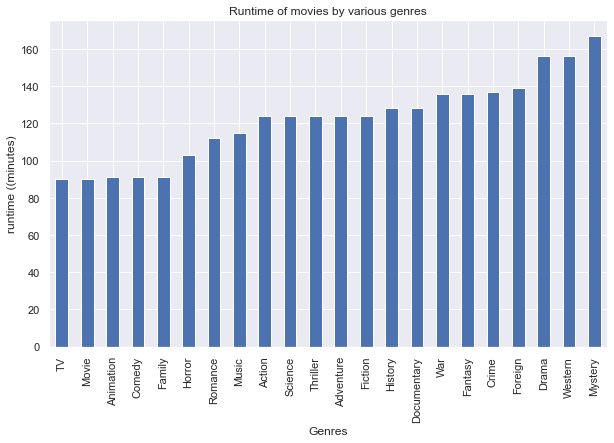

In [499]:
# Comparison of Movies' genres with Average runtime
genre_runtime = df.groupby('genres').runtime.mean().sort_values()
genre_runtime.plot.bar(title = 'Runtime of movies by various genres',xlabel='Genres',ylabel='runtime ((minutes)');

>Genres with least profit appears to have the highest runtime. But 'Action' movie with highest profit is not the least in terms of runtime. This indicates a weak correlation.

> This can further be seen in the next chart.

In [500]:
#Grouping Movies in terms of runtime and profit
movies_runtime = df.groupby(['runtime', 'original_title'], as_index= False)
movies_runtimeaverage = movies_runtime['profit'].mean().sort_values('runtime',ignore_index=True,axis=0, ascending=False)

# Finding the top ten (10) movies
top_moviesruntime = movies_runtimeaverage.head(10)
print(top_moviesruntime)

   runtime                         original_title     profit
0      167                      The Hateful Eight   1.117601
1      156                           The Revenant   3.979505
2      139                      L'ArmÃ©e du crime  -0.100000
3      137                              Furious 7  13.162494
4      136           Star Wars: The Force Awakens  18.681782
5      136  The Hunger Games: Mockingjay - Part 2   4.905234
6      128                                    Amy   0.084131
7      128                              Spotlight   0.683465
8      124                         Jurassic World  13.635288
9      115                        Pitch Perfect 2   2.585062


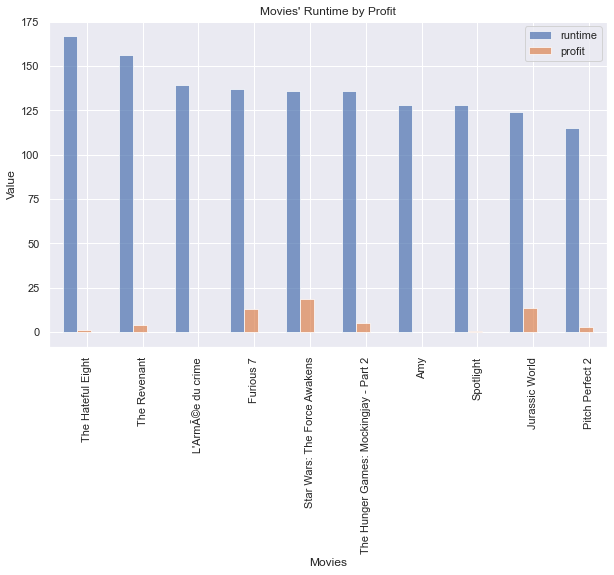

In [501]:
# Plot of Movies' runtime and Profit
ind = np.arange(len(top_moviesruntime['original_title']))  # the x locations for the groups
width = 0.35       # the width of the bars
top_moviesruntime.plot(kind ='bar', title = "Movies' Runtime by Profit", alpha =.7);

# title and labels
plt.ylabel('Value')
plt.xlabel('Movies')
locations = ind + width / 2  # xtick locations
labels = top_moviesruntime['original_title']  # xtick labels
plt.xticks(locations, labels);

> The genre with the highest runtime has low profit but it is not the least. This further explains the partial correlation.

## Who is the most popular Director?

In [502]:
# Finding the most popular Director and his/her movies
popular_director = df.groupby('director')['popularity'].mean().idxmax()
popular_director

'Colin Trevorrow'

In [503]:
# Finding the profitable movies directed by Colin Trevorrow
df =df.drop_duplicates(subset ='director', keep='first', inplace=False) # Drop genres that are duplicated and pick the most popular one.
popular_director_movies = df[df['director'] == 'Colin Trevorrow']
popular_director_movies[['original_title', 'popularity', 'director', 'runtime', 'release_date', 'profit']].style.hide_index()

original_title,popularity,director,runtime,release_date,profit
Jurassic World,32.985763,Colin Trevorrow,124,2015-06-09 00:00:00,13.635288


> "Colin Trevorrow' is the most popular Director and the most profitable movie he directed is "Jurassic World". Jarassic World is also the most popular movie. This indicates that the popularity of 'Director' is strongly correlated to the popularity of his/her movies.

<a id='conclusions'></a>
## Conclusions

>About 10,000 dataset of TMDB has been analyzed and the following are the results:

>1.There are more unpopular movies than the popular ones. 

>2.About 75% of the movies are not profitable (Successful).

>3.'Jussaic World' movie is the most popular movie but not the highest profitable movie. This indicates that the popularity of movies is not only affected by their profit. Other factors such as vote count and budget could also contribute.

>4.Analysis of top ten genres indicates that 'Action' movies are the most popular but not the highest profitable movie. Other factors such as runtime also contribute to the popularity of genres.

>5.Long runtime movies are not as popular and profitable as short runtime movies.

>6.'Colin Trevorrow' is the most popular movie director and one of his movies is the most popular one (Jurassic World). This indicates the the popularity of directors is affected by the popularity of his/her movies.

> Although, we could not analyze factors responsible for unprofitability of most movies with the available dataset, further analysis can be carried out to investigate the production companies and factors that could affect their popularity and profitability.

## Sources 

>1. Udacity Course Videos
>2.	https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
3.	https://levelup.gitconnected.com/how-to-slice-a-dataframe-in-pandas-884bd8b298a6
4.	https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
5.	https://jovian.ai/ashutoshnemani3/tmdb-movie-dataset#C23
6.	https://stackoverflow.com/questions/39128856/python-drop-row-if-two-columns-are-nan
7.	https://stackoverflow.com/questions/43746038/pandas-rows-with-missing-values-in-multiple-columns
8.  https://www.statology.org/how-to-read-a-correlation-matrix/